In [352]:
import pandas as pd
import datetime
indexes = pd.read_csv("indexes2.csv")
speech = pd.read_csv("speech_final.csv")
press = pd.read_csv("press_final_3.csv")

In [353]:
# create indexes in order to concatanate data easily
indexes['date']=[ datetime.datetime.strptime(indexes['Unnamed: 0'][i], '%Y-%m-%d')for i in range(0,len(indexes['Unnamed: 0']))]
indexes['date'] = indexes['Unnamed: 0']
indexes.drop('Unnamed: 0', axis=1)
indexes = indexes.set_index('date')
speech = speech.set_index('date')
press = press.set_index('date')

In [354]:
data = pd.concat([indexes,press,speech], axis=1, sort='date')

In [355]:
data.head(20)

,Unnamed: 0,Y,Y_lag,nasdaq_change,press_neg_title,press_neu_title,press_pos_title,press_compound_title,press_neg_article_text,press_neu_article_text,...,speech_percentage of verbs,speech_percentage of adjectives,speech_percentage of adverbs,speech_federal_fund_rate,speech_monetary_policy,speech_financial_stability,speech_crisis,speech_challenges,speech_risk,speech_number
2006-01-03,2006-01-03,NaN,NaN,NaN,0.000,0.829500,0.170500,0.238350,0.000000,0.898000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,2006-01-04,-0.228828,NaN,0.946462,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-05,2006-01-05,0.000000,-0.228828,0.557840,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-06,2006-01-06,0.458717,0.000000,1.741636,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-09,2006-01-09,0.000000,0.458717,0.398278,0.000,1.000000,0.000000,0.000000,0.009000,0.920000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-10,2006-01-10,1.141548,0.000000,0.121701,0.000,0.956667,0.043333,0.067433,0.012667,0.915333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-11,2006-01-11,0.677204,1.141548,0.815356,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-12,2006-01-12,-0.896859,0.677204,-0.619370,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-13,2006-01-13,-1.357466,-0.896859,-0.032616,0.082,0.651000,0.267000,0.289700,0.019500,0.841000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-17,2006-01-17,-0.458717,-1.357466,-0.594807,0.000,0.659000,0.341000,0.476700,0.000000,0.841000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [358]:
# we don't want null values - so if they appear we take data from the previous speech/press release
# (as if it had importance for further actions for investors)
data = data.fillna(method='ffill')

In [361]:
# first 10 rows have NaN values (the first speech released in the mid January)
data=data[10:]

In [362]:
data.head(30)

,Unnamed: 0,Y,Y_lag,nasdaq_change,press_neg_title,press_neu_title,press_pos_title,press_compound_title,press_neg_article_text,press_neu_article_text,...,speech_percentage of verbs,speech_percentage of adjectives,speech_percentage of adverbs,speech_federal_fund_rate,speech_monetary_policy,speech_financial_stability,speech_crisis,speech_challenges,speech_risk,speech_number
2006-02-15,2006-02-15,-0.216442,0.873363,0.673914,0.000,1.000000,0.000000,0.000000,0.000000,0.973000,...,0.109737,0.061824,0.041731,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2006-02-16,2006-02-16,-0.433838,-0.216442,0.924003,0.000,1.000000,0.000000,0.000000,0.000000,0.973000,...,0.109737,0.061824,0.041731,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2006-02-17,2006-02-17,-1.089328,-0.433838,-0.793552,0.000,0.855000,0.145000,0.177900,0.000000,0.919000,...,0.109737,0.061824,0.041731,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2006-02-21,2006-02-21,0.660801,-1.089328,-1.165819,0.000,1.000000,0.000000,0.000000,0.000000,0.983000,...,0.109737,0.061824,0.041731,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2006-02-22,2006-02-22,-0.875270,0.660801,1.319098,0.121,0.879000,0.000000,-0.296000,0.048000,0.864000,...,0.109737,0.061824,0.041731,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2006-02-23,2006-02-23,0.662243,-0.875270,-0.311768,0.121,0.879000,0.000000,-0.296000,0.048000,0.864000,...,0.130908,0.107446,0.032642,0.0,0.0,1.0,0.0,1.0,0.0,1.0
2006-02-24,2006-02-24,0.438595,0.662243,0.251746,0.000,0.886333,0.113667,0.158900,0.000000,0.929333,...,0.113511,0.091324,0.036970,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2006-02-27,2006-02-27,0.218344,0.438595,1.142859,0.000,0.780000,0.220000,0.476700,0.029000,0.913000,...,0.113511,0.091324,0.036970,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2006-02-28,2006-02-28,-0.871462,0.218344,-1.479667,0.000,1.000000,0.000000,0.000000,0.000000,0.909000,...,0.113511,0.091324,0.036970,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2006-03-01,2006-03-01,0.879121,-0.871462,1.437235,0.000,1.000000,0.000000,0.000000,0.022000,0.955000,...,0.113511,0.091324,0.036970,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [109]:
data.shape

(3687, 55)

In [127]:
data.to_csv("data2.csv")

In [110]:
# imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve
from matplotlib import pyplot
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

In [240]:
y = data['Y'].values
X = data.iloc[:,2:].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [321]:
class AlgorithmFinder():
    # finds the best set of hyperparameters for each model, attributes: X_train, y_train, X_test, y_test based on Pipeline
    # and GridSearchCV methods
    # methods:
    # find_the_best_tree - looks for the best hyperparameters for DecisionTreeRegressor
    # find_the_best_xgboost - looks for the best hyperparameters for GradientBoostingRegressor
    # find_the_best_net - looks for the best hyperparameters for MLPRegressor
    # Each method prints MSE for train and test dataset and returns the best set of parameters
    def __init__(self,  X_train, y_train, X_test, y_test):
        
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test=y_test
        
    def find_the_best_tree(self):
        pipe_tree = Pipeline([('tree', DecisionTreeRegressor(random_state=1))])

        param_grid = [{'tree__max_depth': [2,4, 6, 8, 10, 12], 'tree__min_samples_split': [2, 4, 6, 8, 10], \
                      'tree__min_samples_leaf': [1,3,5], 'tree__max_features': ['auto', 'sqrt']}]
        gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
        gs = gs.fit(self.X_train, self.y_train)
        print('Training MSE: %.3f' % gs.score(self.X_train, self.y_train))
        print('Test MSE: %.3f' % gs.score(self.X_test, self.y_test))
        return gs.best_params_
    
    def find_the_best_xgboost(self):

        pipe_xgboost = Pipeline([('xgboost',GradientBoostingRegressor(random_state=1))])
        param_grid = [{'xgboost__max_depth': [3,6, 9], 'xgboost__min_samples_split': [2, 4, 6], \
              'xgboost__min_samples_leaf': [1,5],  \
               'xgboost__max_features': ['auto', 'sqrt'], 'xgboost__learning_rate':[0.1, 0.01, 0.001]}]
        gs = GridSearchCV(estimator=pipe_xgboost, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
        gs = gs.fit(self.X_train, self.y_train)
        print('Training MSE: %.3f' % gs.score(self.X_train, self.y_train))
        print('Test MSE: %.3f' % gs.score(self.X_test, self.y_test))
        print(gs.best_score_)
        return gs.best_params_

    def find_the_best_net(self):
        pipe_net = Pipeline([('scaler', StandardScaler()), 
                        ('net', MLPRegressor(random_state=1))])

        param_grid = [{'net__activation': ['identity', 'tanh', 'relu'], 'net__max_iter':[1000], 'net__alpha': [0.0001, 0.001], \
                  'net__tol': [0.01, 0.0001], 'net__hidden_layer_sizes':[(64, 32, 32,), (64, 8,), (100,)]}]

        gs = GridSearchCV(estimator=pipe_net, param_grid=param_grid, scoring='neg_mean_squared_error', cv=10)
        gs = gs.fit(self.X_train, self.y_train)
        print('Training MSE: %.3f' % gs.score(self.X_train, self.y_train))
        print('Test MSE: %.3f' % gs.score(self.X_test, self.y_test))
        print(gs.best_score_)
        return gs.best_params_
 

In [246]:
# find the best tree
find_algorithm = AlgorithmFinder(X_train, y_train, X_test,y_test)
find_algorithm.find_the_best_tree()

Training MSE: -4.283
Test MSE: -6.419


{'tree__max_depth': 6,
 'tree__max_features': 'auto',
 'tree__min_samples_leaf': 1,
 'tree__min_samples_split': 2}

In [270]:
class AlgorithmPresenter():
# Visualazises the results of algorithm for the dataset. Methods:
# plot_importance - show importance of features in the model (DecisionTreeRegressor , GradientBoostingRegressor)
# plot_true_and_prediction - show the true values of y and the predicted y in one plot
    def __init__(self,  X, y):
        
        self.X = X
        self.y = y

    # Feature importance
    def plot_importance(self, model):
        importance = model.feature_importances_
        # summarize feature importance
        for i,v in enumerate(importance):
            print('Feature: %0d, Score: %.5f' % (i,v))
        # plot feature importance
        pyplot.bar([x for x in range(len(importance))], importance)
        return pyplot.show()
    
    def plot_true_and_prediction(self, model):
        # plot the true values and predictions
        y_all_pred = model.predict(self.X)
        plt.plot(self.y)
        plt.plot(y_all_pred)

        plt.title("True values (blue) versus predictions (orange)")
        plt.xlabel("Number of days", fontsize=16)
        plt.ylabel("Change in yield of treasury bonds", fontsize=12)
        return pyplot.show()

In [271]:
# present algotithm for the best tre
best_tree = DecisionTreeRegressor(random_state=1, max_depth = 6, max_features = 'auto', min_samples_leaf = 1, min_samples_split=2)
best_tree.fit(X_train, y_train)
algorithm_presenter = AlgorithmPresenter(X,y)

Feature: 0, Score: 0.49209
Feature: 1, Score: 0.32833
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00424
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.02447
Feature: 6, Score: 0.00047
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00012
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00197
Feature: 17, Score: 0.00633
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

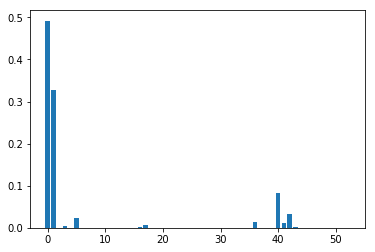

In [258]:
algorithm_presenter.plot_importance(best_tree)

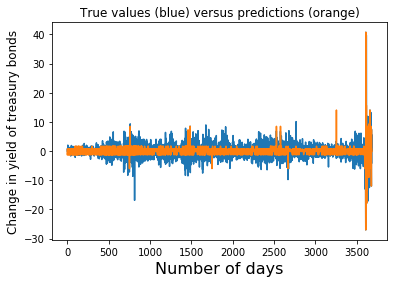

In [272]:
algorithm_presenter.plot_true_and_prediction(best_tree)

In [365]:
# outliers can be observed. We decided to remove the period of ~4 months that can be connected with the corona crisis and has
# negative impact on predictions quality
# We are looking for next best tree but for a bit smaller data
X = data.iloc[:3530,2:].values
y = data['Y'].values[:3530]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [278]:
find_algorithm = AlgorithmFinder(X_train, y_train, X_test,y_test)
find_algorithm.find_the_best_tree()

Training MSE: -3.867
Test MSE: -4.251


{'tree__max_depth': 2,
 'tree__max_features': 'auto',
 'tree__min_samples_leaf': 1,
 'tree__min_samples_split': 2}

In [279]:
# show the most important features
best_tree = DecisionTreeRegressor(random_state=1, max_depth = 2, max_features = 'auto', min_samples_leaf = 1, min_samples_split=2)
best_tree.fit(X_train, y_train)
algorithm_presenter = AlgorithmPresenter(X,y)

Feature: 0, Score: 0.00000
Feature: 1, Score: 1.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

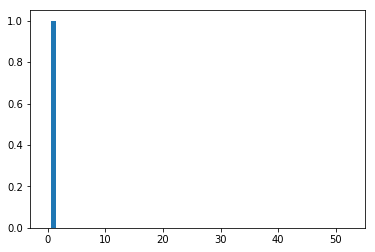

In [280]:
algorithm_presenter.plot_importance(best_tree)
# the second feature (nasdaq change) turned out as the only important feature - we remove it from the further analysis for trees

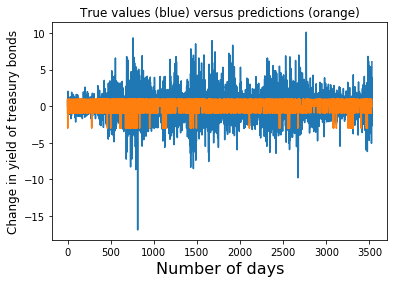

In [281]:
algorithm_presenter.plot_true_and_prediction(best_tree)

In [366]:
# without column 3 (nasdaq change)
X = data.iloc[:3530,[2,4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,\
            38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
find_algorithm = AlgorithmFinder(X_train, y_train, X_test,y_test)
find_algorithm.find_the_best_tree()

Training MSE: -4.544
Test MSE: -4.439


{'tree__max_depth': 2,
 'tree__max_features': 'sqrt',
 'tree__min_samples_leaf': 3,
 'tree__min_samples_split': 10}

Feature: 0, Score: 0.12811
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.00000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.60603
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.26585
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000
Feature: 35, Score: 0.00000
Fe

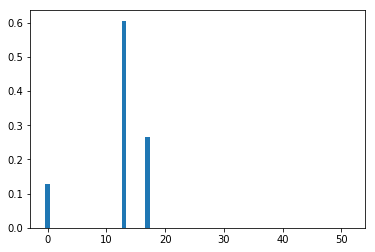

In [367]:
# presentation of the new tree
best_tree = DecisionTreeRegressor(random_state=1, max_depth = 2, max_features = 'sqrt', min_samples_leaf = 3, min_samples_split=10)
best_tree.fit(X_train, y_train)
algorithm_presenter = AlgorithmPresenter(X,y)
algorithm_presenter.plot_importance(best_tree)

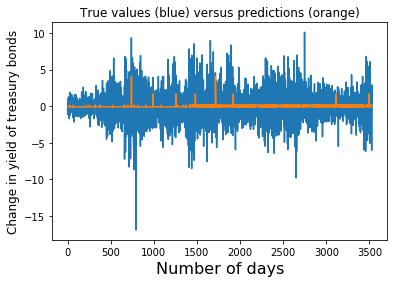

In [368]:
algorithm_presenter.plot_true_and_prediction(best_tree)
# but results are really week:

In [315]:
# Let's go to xgboost:
X = data.iloc[:3530,2:].values
y = data['Y'].values[:3530]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
find_algorithm = AlgorithmFinder(X_train, y_train, X_test,y_test)
find_algorithm.find_the_best_xgboost()

Training MSE: -2.773
Test MSE: -4.131
-3.9486023547917846


{'xgboost__learning_rate': 0.1,
 'xgboost__max_depth': 3,
 'xgboost__max_features': 'auto',
 'xgboost__min_samples_leaf': 5,
 'xgboost__min_samples_split': 2}

Feature: 0, Score: 0.13789
Feature: 1, Score: 0.43325
Feature: 2, Score: 0.00571
Feature: 3, Score: 0.01275
Feature: 4, Score: 0.00417
Feature: 5, Score: 0.00891
Feature: 6, Score: 0.00407
Feature: 7, Score: 0.01033
Feature: 8, Score: 0.01358
Feature: 9, Score: 0.02702
Feature: 10, Score: 0.00733
Feature: 11, Score: 0.00230
Feature: 12, Score: 0.01870
Feature: 13, Score: 0.01984
Feature: 14, Score: 0.04231
Feature: 15, Score: 0.01643
Feature: 16, Score: 0.02169
Feature: 17, Score: 0.02716
Feature: 18, Score: 0.00284
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00395
Feature: 21, Score: 0.00330
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00135
Feature: 24, Score: 0.00576
Feature: 25, Score: 0.00192
Feature: 26, Score: 0.00376
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00082
Feature: 30, Score: 0.00382
Feature: 31, Score: 0.00157
Feature: 32, Score: 0.01100
Feature: 33, Score: 0.02449
Feature: 34, Score: 0.00994
Feature: 35, Score: 0.02088
Fe

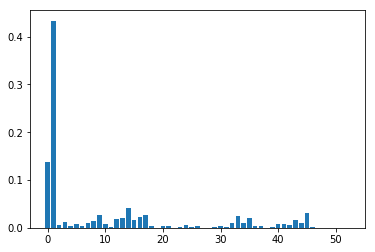

In [316]:
# presentation of the algorithm:
best_xgboost = GradientBoostingRegressor(random_state=1,learning_rate = 0.1, max_depth=3, \
                                     max_features = 'auto',min_samples_leaf = 5, min_samples_split=2)
best_xgboost.fit(X_train, y_train)
algorithm_presenter = AlgorithmPresenter(X,y)
algorithm_presenter.plot_importance(best_xgboost)

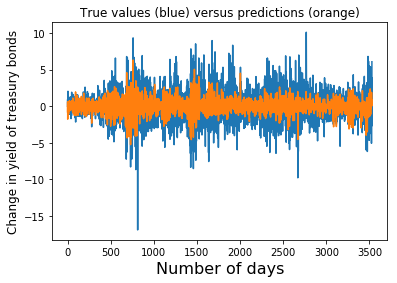

In [317]:
# true values vs predictions
algorithm_presenter.plot_true_and_prediction(best_xgboost)

In [327]:
# one more time, to look how it works for the whole dataset
X = data.iloc[:,2:].values
y = data['Y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
find_algorithm = AlgorithmFinder(X_train, y_train, X_test,y_test)
find_algorithm.find_the_best_xgboost()

Training MSE: -3.837
Test MSE: -6.034
-6.1155426527775045


{'xgboost__learning_rate': 0.01,
 'xgboost__max_depth': 9,
 'xgboost__max_features': 'auto',
 'xgboost__min_samples_leaf': 1,
 'xgboost__min_samples_split': 6}

Feature: 0, Score: 0.42196
Feature: 1, Score: 0.28993
Feature: 2, Score: 0.00208
Feature: 3, Score: 0.00409
Feature: 4, Score: 0.00111
Feature: 5, Score: 0.02271
Feature: 6, Score: 0.00411
Feature: 7, Score: 0.00633
Feature: 8, Score: 0.00324
Feature: 9, Score: 0.00630
Feature: 10, Score: 0.00465
Feature: 11, Score: 0.01028
Feature: 12, Score: 0.00301
Feature: 13, Score: 0.00563
Feature: 14, Score: 0.01660
Feature: 15, Score: 0.00951
Feature: 16, Score: 0.02423
Feature: 17, Score: 0.01974
Feature: 18, Score: 0.00041
Feature: 19, Score: 0.00043
Feature: 20, Score: 0.00003
Feature: 21, Score: 0.00119
Feature: 22, Score: 0.00045
Feature: 23, Score: 0.00031
Feature: 24, Score: 0.00054
Feature: 25, Score: 0.00055
Feature: 26, Score: 0.00156
Feature: 27, Score: 0.00016
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00110
Feature: 30, Score: 0.00456
Feature: 31, Score: 0.00598
Feature: 32, Score: 0.00527
Feature: 33, Score: 0.01802
Feature: 34, Score: 0.00571
Feature: 35, Score: 0.00395
Fe

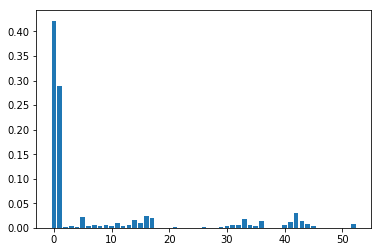

In [328]:
best_xgboost = GradientBoostingRegressor(random_state=1,learning_rate = 0.01, max_depth=9, \
                                     max_features = 'auto',min_samples_leaf = 1, min_samples_split=6)
best_xgboost.fit(X_train, y_train)
algorithm_presenter = AlgorithmPresenter(X,y)
algorithm_presenter.plot_importance(best_xgboost)

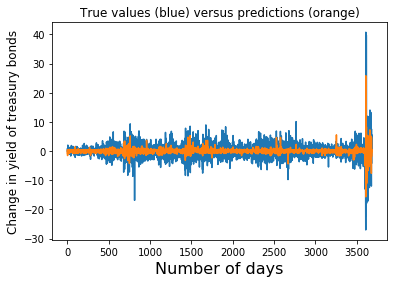

In [329]:
algorithm_presenter.plot_true_and_prediction(best_xgboost)
# again, outliers are negative impact on the model

In [322]:
# Looking for neural net:
X = data.iloc[:3530,2:].values
y = data['Y'].values[:3530]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
find_algorithm = AlgorithmFinder(X_train, y_train, X_test,y_test)
find_algorithm.find_the_best_net()

Training MSE: -3.796
Test MSE: -4.170
-3.970825856851139


{'net__activation': 'identity',
 'net__alpha': 0.001,
 'net__hidden_layer_sizes': (64, 32, 32),
 'net__max_iter': 1000,
 'net__tol': 0.0001}

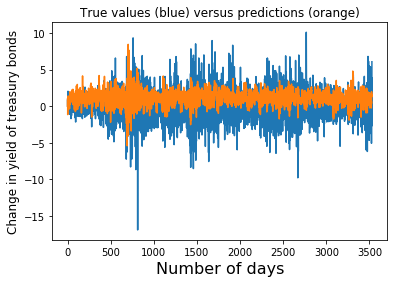

In [325]:
# Compare true values and predictions:
best_net = MLPRegressor(random_state=1, activation = 'identity', alpha = 0.001, hidden_layer_sizes=(64,32,32), max_iter=1000,\
                       tol = 0.0001)
best_net.fit(X_train, y_train)
algorithm_presenter = AlgorithmPresenter(X,y)
algorithm_presenter.plot_true_and_prediction(best_net)